### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


#### Read Dataset to Memory

In [4]:
bank_note = pd.read_csv('data_banknote_authentication.txt')
bank_note

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


#### Data Cleaning

In [5]:
bank_note.columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'class']
bank_note

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


#### Data Exploration

In [6]:
bank_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1371 non-null   float64
 1   skewness  1371 non-null   float64
 2   kurtosis  1371 non-null   float64
 3   entropy   1371 non-null   float64
 4   class     1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bank_note.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [8]:
bank_note.sample(5)

,variance,skewness,kurtosis,entropy,class
1273,-2.5526,-7.36250,6.92550,-0.66811,1
947,-3.4917,-12.17360,14.36890,-0.61639,1
463,5.7403,-0.44284,0.38015,1.37630,0
274,3.4312,6.26370,-1.95130,-0.36165,0
982,-2.0336,-1.40920,1.15820,0.36507,1


In [9]:
bank_note.describe()

,variance,skewness,kurtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
bank_note.dtypes

variance    float64
skewness    float64
kurtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
bank_note.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [12]:
bank_note.duplicated().sum()

24

In [13]:
bank_note['class'].value_counts()

0    761
1    610
Name: class, dtype: int64

#### Data Visualization

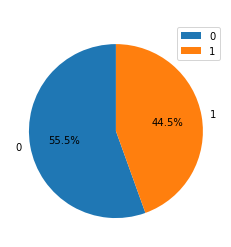

In [40]:
# Distribution of Target Variable
bank_pie = bank_note['class'].value_counts()
plt.pie(bank_pie, labels=bank_pie.index.tolist(), autopct='%1.1f%%',startangle=90);
plt.title('Distribution of Target Variable', fontdict={'color':'white'})
plt.legend()
plt.show()

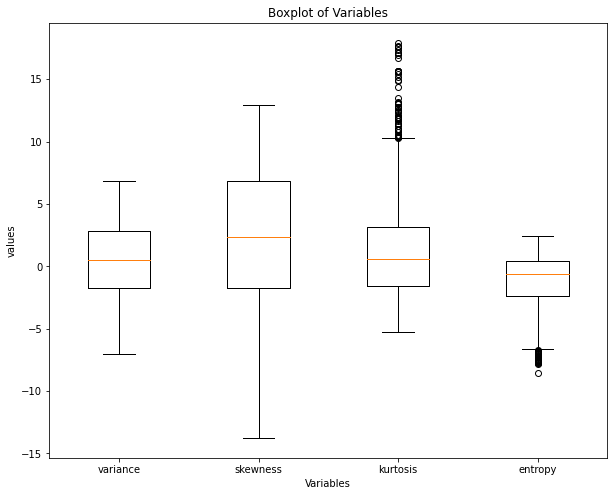

In [15]:
# Create a Boxplot of Variables
plt.figure(figsize= (10,8))
plt.boxplot(bank_note.drop('class', axis=1))
plt.xticks([1,2,3,4],['variance','skewness','kurtosis','entropy'])
plt.ylabel('values')
plt.xlabel('Variables')
plt.title('Boxplot of Variables')
plt.show()

Text(0.5, 0.98, 'Frequency Distribution of Variables')

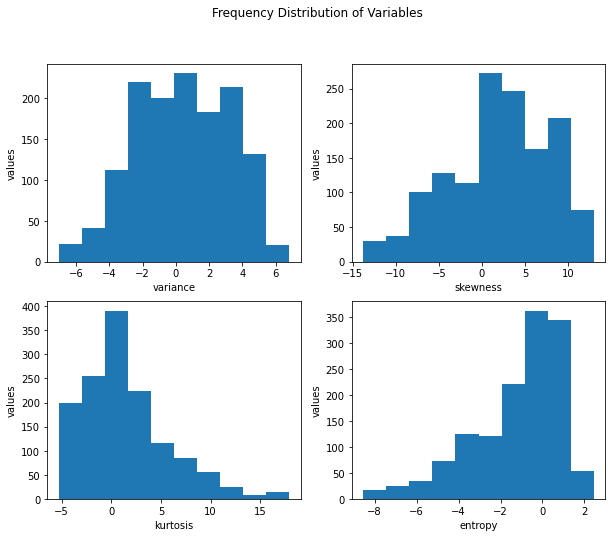

In [41]:
# Plot Frequency Distribution of Variables
fig, ax = plt.subplots(ncols=2, nrows=2, figsize= (10,8))
ax[0,0].hist(bank_note['variance'])
ax[0,0].set_ylabel('values')
ax[0,0].set_xlabel('variance')
ax[0,1].hist(bank_note['skewness'])
ax[0,1].set_ylabel('values')
ax[0,1].set_xlabel('skewness')
ax[1,0].hist(bank_note['kurtosis'])
ax[1,0].set_ylabel('values')
ax[1,0].set_xlabel('kurtosis')
ax[1,1].hist(bank_note['entropy'])
ax[1,1].set_ylabel('values')
ax[1,1].set_xlabel('entropy')
plt.suptitle('Frequency Distribution of Variables')

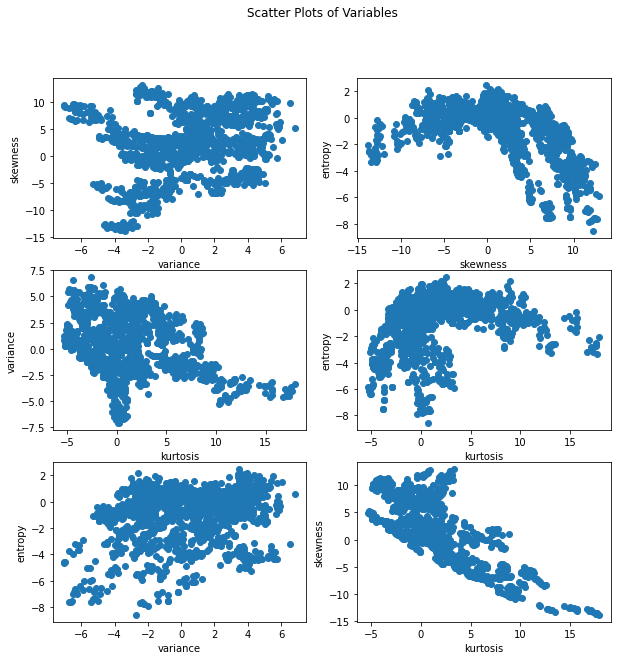

In [42]:
# Plot Scatter Plots of Variables
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
ax[0,0].scatter(x=bank_note['variance'], y=bank_note['skewness'])
ax[0,0].set_ylabel('skewness')
ax[0,0].set_xlabel('variance')
ax[0,1].scatter(x=bank_note['skewness'], y=bank_note['entropy'])
ax[0,1].set_ylabel('entropy')
ax[0,1].set_xlabel('skewness')
ax[1,0].scatter(x=bank_note['kurtosis'], y=bank_note['variance'])
ax[1,0].set_ylabel('variance')
ax[1,0].set_xlabel('kurtosis')
ax[1,1].scatter(x=bank_note['kurtosis'], y=bank_note['entropy'])
ax[1,1].set_ylabel('entropy')
ax[1,1].set_xlabel('kurtosis')
ax[2,0].scatter(x=bank_note['variance'], y=bank_note['entropy'])
ax[2,0].set_ylabel('entropy')
ax[2,0].set_xlabel('variance')
ax[2,1].scatter(x=bank_note['kurtosis'], y=bank_note['skewness'])
ax[2,1].set_ylabel('skewness')
ax[2,1].set_xlabel('kurtosis')
plt.suptitle('Scatter Plots of Variables')
plt.show()


Text(0.5, 0.98, 'Pair Plots of Variables')

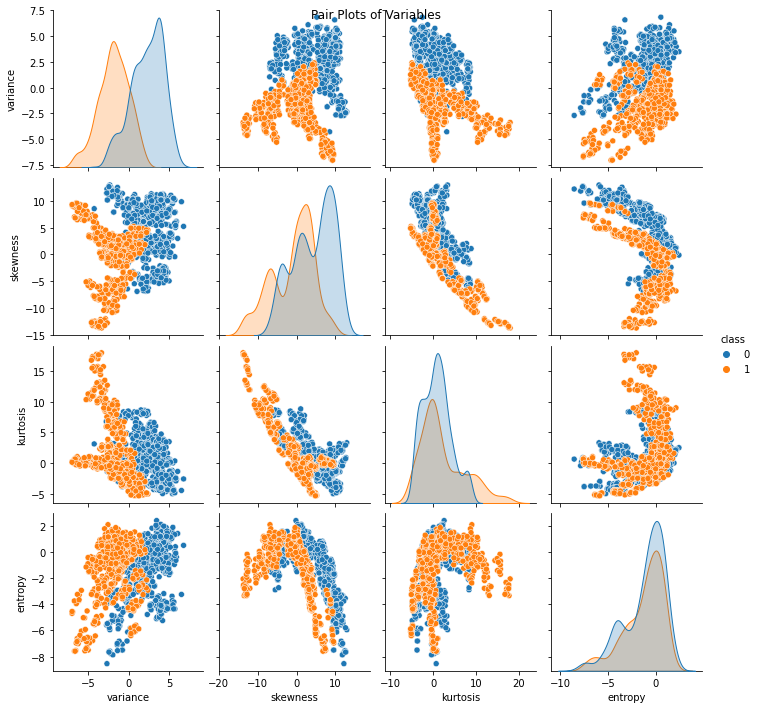

In [43]:
# Pair plots of Variables
sns.pairplot(bank_note, hue='class')
plt.suptitle('Pair Plots of Variables')

<AxesSubplot:>

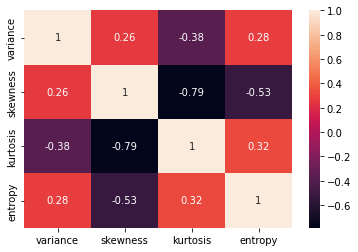

In [19]:
# Correlation Matrix
sns.heatmap(bank_note.drop('class', axis=1).corr(), annot=True)

#### Data Processing (Scaling)

In [20]:
# create an object called scaler
scaler = StandardScaler() 
# Fit scaler to the features
scaler.fit(bank_note.drop('class', axis=1)) 
#Transform feature to scaled version
scaled_features = scaler.fit_transform(bank_note.drop('class', axis=1)) 
scaled_features


array([[ 1.44802089,  1.06541654, -0.89573284, -0.12846788],
       [ 1.20874229, -0.776605  ,  0.12150444,  0.61813474],
       [ 1.06466131,  1.2964683 , -1.25608755, -1.14340573],
       ...,
       [-1.47167779, -2.62111537,  3.75824145, -0.75438509],
       [-1.40600727, -1.75583898,  2.5512876 , -0.04288619],
       [-1.0464031 , -0.43903487,  0.2978986 ,  1.13636088]])

In [21]:
# Convert scaled data to dataframe
scaled_banknote = pd.DataFrame(data = scaled_features, columns=bank_note.columns[0:4])

In [22]:
# Compare raw data with Scaled data
scaled_banknote.head()
bank_note.head()

,variance,skewness,kurtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


#### Train Test Splitting

In [23]:
X = scaled_banknote
y = bank_note['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, shuffle=True, random_state=42)

In [24]:
# Check distribution of training data
y_train.value_counts(normalize=True)

0    0.559307
1    0.440693
Name: class, dtype: float64

#### Model Training

##### Decision Tree

In [25]:
model_dtree = DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)
pred_dtree = model_dtree.predict(X_test)

In [26]:
score_dtree = accuracy_score(y_test, pred_dtree)
score_dtree

0.9781818181818182

In [27]:
print(confusion_matrix(pred_dtree,y_test))

[[147   5]
 [  1 122]]


<AxesSubplot:>

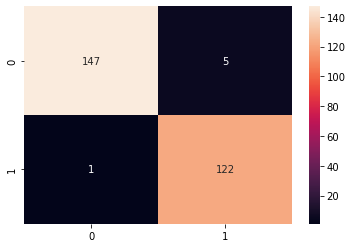

In [28]:
sns.heatmap(confusion_matrix(pred_dtree,y_test), annot=True, fmt='.0f')

In [29]:
print(classification_report(pred_dtree,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       152
           1       0.96      0.99      0.98       123

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



##### Logistic Regression

In [30]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
pred_LR = model_LR.predict(X_test)
score_LR = accuracy_score(y_test, pred_LR)
score_LR

0.9781818181818182

In [34]:
print(confusion_matrix(pred_LR,y_test))

[[143   1]
 [  5 126]]


<AxesSubplot:>

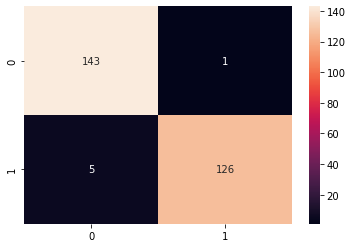

In [35]:
sns.heatmap(confusion_matrix(pred_LR,y_test), annot=True, fmt='.0f')

In [36]:

print(classification_report(pred_LR,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.99      0.96      0.98       131

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [45]:
import pickle
with open ('decision_tree.pkl', 'wb') as f:
    pickle.dump(model_dtree, f)
    

In [46]:
import pickle
with open ('logistic.pkl', 'wb') as f:
    pickle.dump(model_LR, f)

In [47]:
import os

In [55]:
log_model= os.stat('logistic.pkl')
print(f' Logsitic model file size is {round(log_model.st_size/1024, 3)} MegaBytes')

 Logsitic model file size is 0.724 MegaBytes


In [56]:
dec_model= os.stat('decision_tree.pkl')
print(f' Decision tree model file size is {round(dec_model.st_size/1024, 3)} MegaBytes')

 Decision tree model file size is 4.487 MegaBytes


In [71]:
import pickle
from sklearn.preprocessing import StandardScaler
import numpy as np

model= pickle.load(open('logistic.pkl', 'rb'))

def four_number(number: np.array):
    number= number.reshape(-1, 1)
    scaler= StandardScaler()
    new= scaler.fit_transform(X= number)
    model_prediction= model.predict(new.reshape(1,-1))
    dc= {1: 'fake',
         0: 'Authentic'}

    if model_prediction==1:
        mp= 'This money is fake '
    else:
        mp= 'This Money is Authentic'


    return mp


four_number(number = np.array([3.866,-2.6383,1.9242,0.10645]))

'This Money is Authentic'

In [72]:
four_number(number = np.array([-2.6864,-0.097265,0.61663,0.061192]))

'This money is fake '

In [74]:
four_number(number = np.array([8.6864,-1.097265,2.61663,1.061192]))

'This Money is Authentic'